##### Article list
* machine learning / ai
* how machine learning works
* machine learning algorithms
    * Supervised -> linear / logistic regression, svm, Decision trees, Random forests, k-NN, Neural networks, Naive bayes - explain with 1/2 problems
    * Unsupervised -> K-Means Clustering, Hierarchical Clustering, Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Gaussian Mixture Models (GMM), Autoencoders, Self-Organizing Maps (SOM), DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
    * Semi-Supervised -> Self-training, Co-training, Generative Models (Generative Adversarial Networks)
    * Reinforcement -> Q-Learning, Deep Q-Networks (DQN), Policy Gradient Methods, Actor-Critic Methods, Deep Deterministic Policy Gradient (DDPG), Proximal Policy Optimization (PPO)
    * Ensemble -> Bagging (Bootstrap Aggregating), Boosting (e.g., AdaBoost, Gradient Boosting), Stacking, Voting Classifiers
    * Deep Learning -> CNN, RNN, LSTM, Gated Recurrent Units (GRU), Transformer Models, Capsule Networks, Variational Autoencoders (VAE), Generative Adversarial Networks (GAN)
    * Anomaly Detection -> Isolation Forest, One-Class SVM, Autoencoders, Local Outlier Factor (LOF)
    * Dimensionality Reduction -> Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Autoencoders
    * Feature Selection -> Recursive Feature Elimination (RFE), Feature Importance (e.g., from tree-based models), Lasso Regression
* AI algorithms

* research topic
    * how ai can reduced improve the environment

### Vision input output

raw image -> numerical encoding -> model -> output -> predicted output <br>

* input shapes
```[batch_size, width, height, color_channel]``` ex: [None, 224, 224, 3], [32, 224, 224, 3]

batch_size is problem specific depending on hardware

* output shape: number of class [n, ....]

Different input shapes (for different frameworks):
1. shape -> [None, 28, 28, 1] (NHWC)
2. shape -> [None, 1, 28, 28] (NCHW)

##### Path to build
* Get the data ready (convert to tensors)
* Build or pick a model - Pick a loss function, Build a training loop
* Fit the model to the data and make prediction
* Evaluate the model
* Improve through experimentation
* Save and reload the trained model

#### CNN
- Convolutional layer - 'requires input data, filter (feature detector/kernel), featuremap'
`nb`: we have a feature detector, also known as a kernel or a filter, which will move across the receptive fields of the image, checking if the feature is present. This process is known as a convolution.
- Pooling layer
- Fully-connected layer

#### Libs
* `torchvision.datasets` - get datasets and data loading function for computer vision here
* `torchvision.models` - pytorch pre-trained modesl
* `torchvision.transforms` - functions  for manipulating vision data to be suitable for use with
* `torch.utils.data.Dataset` - Base dataset class for pytorch
* `torch.utils.data.DataLoader` - create python iterable over a

In [2]:
import ipykernel
print(ipykernel.__version__)
print("5dc3a68c-e34e-4080-9c3e-2a532b2ccb4d")
print(ipykernel.__file__)

6.28.0
5dc3a68c-e34e-4080-9c3e-2a532b2ccb4d
c:\dev\anaconda3\Lib\site-packages\ipykernel\__init__.py


In [3]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
%matplotlib inline
import matplotlib.pyplot as plt

import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#### Device agnostic

In [4]:
torch.cuda.is_available()
import torch
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

1. Getting dataset
`FashionMNIST`

In [5]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
image, label = train_data[0]

type(image)

torch.Tensor

In [8]:
class_names = train_data.classes
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Image size: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

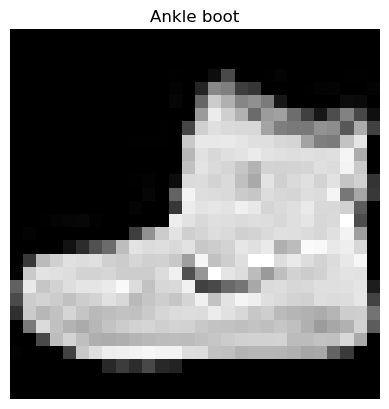

In [9]:
from PIL import Image

image, label = train_data[0]
print(f'Image size: {image.shape}')

# Image.open(image.permute(1, 2, 0)).show()
# torch.Tensor.toPILImage(image)

plt.imshow(image.permute(1,2,0), cmap='gray')
plt.title(label=class_names[label])
plt.axis(False)

# _image = image.numpy()

# plt.imshow(_image)
# plt.title(label=class_names[label])
# plt.axis(False)

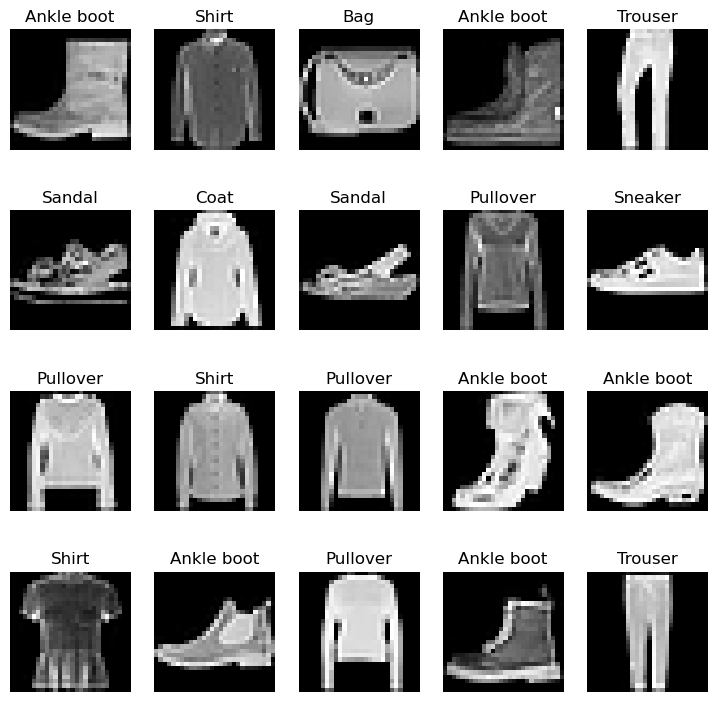

In [10]:
# plot more
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 5
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=(1, )).item()
    # print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

#### 2. prepare dataloader

Now dataset is in form of pytorch datasets.
DataLoader turns dataset into a python iterable or turn into mini-batches

1. its more computationally efficient as in computing hardware
2. it gives our neural network more chanaces to update its gradients per epoch

dataloader: https://pytorch.org/docs/stable/data.html

In [12]:
from torch.utils.data import DataLoader

# setup batch size hyperparameter
BATCH_SIZE = 32

# turn datasets intor iterables
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x21620ac0e90>,
 <torch.utils.data.dataloader.DataLoader at 0x216272bb450>)

In [13]:
next(iter(['a', 'b', 'c', 'd']))


'a'

In [14]:
print(f'Dataloader: {train_dataloader, test_dataloader}')
print(f'Length: train - {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Lenght: test - {len(test_dataloader)} batches of {BATCH_SIZE}')

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x0000021620AC0E90>, <torch.utils.data.dataloader.DataLoader object at 0x00000216272BB450>)
Length: train - 1875 batches of 32
Lenght: test - 313 batches of 32


torch.Size([32, 1, 28, 28]) torch.Size([32])
Image size: torch.Size([1, 28, 28])
Label: 7, label shape: torch.Size([])


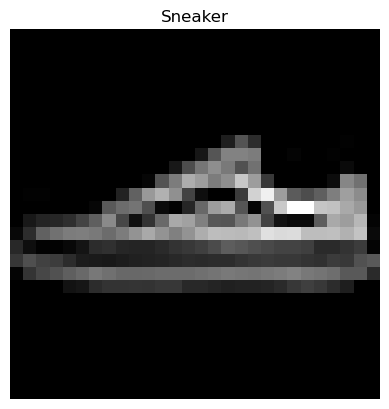

In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape, train_labels_batch.shape)
# show a sample from dataloader
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label: {label}, label shape: {label.shape}')

In [16]:
len(train_features_batch)

32

#### Create model0

build a baseline model

In [17]:
rnd_num = torch.randn(32, 1, 20, 30)

flatte_layer = nn.Flatten(end_dim=-1)
output = flatte_layer(rnd_num)

# output.dim
print(f'Output shape: {output.shape}')

batch_size = output.shape[0]
data_size = output.shape[1]

batch = output[:, None, None]
data = output[None, :, :]

batch.shape


Output shape: torch.Size([32, 600])


torch.Size([32, 1, 1, 600])

In [18]:
# flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x)

print(f'Shape before flattening: {x.shape}')
print(f'Shape after flattening: {output.shape}')

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [19]:
input = torch.randn(32, 1, 5, 5)

flatten = nn.Flatten(end_dim=-1) 
output1 = flatten(input)
output2 = flatten(output1)
output2.size()
# print(input)
# output.squeeze()

torch.Size([32, 25])

In [20]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int,  output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)

In [21]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28, # or 784
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)

model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

#### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD()`
* Evaluation metric - since we are working on classification problem, lets use accuracy as our evaluation metric

In [24]:
import requests
from pathlib import Path

urls = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py'

# download helper function
if Path('helper_functions.py').is_file():
    print('helper_functions.py already exists.')
else:
    print('Downloading helper_function.py')
    request = requests.get(url=urls)
    with open('helper_functions.py', 'wb') as file:
        file.write(request.content)


helper_functions.py already exists.


In [25]:
# import accuracy metric
from helper_functions import accuracy_fn

# setup loss funtion and optimizer
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


### 3.2 Creating a function to time our experiments

ml is experimental.

2 main things often want to track are:
1. Models performance (loss and accuracy value)
2. How fast it runs


In [26]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """ difference between start and end time """
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time


In [27]:
start_time = timer()

end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')


Train time on cpu: 0.000 seconds


3.749999999058673e-05

#### Creating a training loop and trainning a model on batches of data
The optimizer will update a models parameters once per batch rather than once per epoch

## Creating a training loop and training a model on batches of data
1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. print out whats happening
5. Time it all

In [28]:
#import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timers
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# create the training and test loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-------------')
    ### training
    train_loss = 0

    # add a loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)}')

# divide total train loss by lenght of train dataloader
train_loss /= len(train_dataloader)


### Testing loop
test_loss, test_acc = 0, 0
model_0.eval()
with torch.inference_mode():
    for X_test, y_test in test_dataloader:
        # 1. forward pass
        # test_pred_logits = model_0(X_test)
        X_test, y_test = X_test.to(device), y_test.to(device)
        test_pred = model_0(X_test)

        # 2. Calculate loss (accumulatively)
        test_loss += loss_fn(test_pred, y_test)

        # 3. Calculate accuracy
        test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

# Prints whats happen
print(f'\n Train loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000
Epoch: 1
-------------
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000
Epoch: 2
-------------
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

 Train loss: 0.4532 | Test Loss: 0.5109, Test acc: 82.3782
Train time on cuda:0: 62.173 seconds


### Get predictions and model_0 results

In [29]:
torch.manual_seed(42)

def  eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
    """ Returns a dictionary containing the results of model predicting on data_loader """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            _X, _y = X.to(device), y.to(device)
            # make predictions
            # print(next(iter(X)).device)
            y_pred = model(_X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, _y)
            acc += accuracy_fn(y_true=_y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc to fund the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


# Calculate model 0 results on test datasets
model_0_results = eval_model(model=model_0, 
                            data_loader=test_dataloader, 
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5108763575553894,
 'model_acc': 82.37819488817891}

### building model with non-linearrity

In [30]:
# create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # input into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [31]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [32]:
# create an instance model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send the gpu if available


next(model_1.parameters()).device

device(type='cuda', index=0)

#### 6.1 Setup Loss, Optimizer and Evaluation metrics

In [33]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


#### Functionizing training and evaluation / testing loop
* training loop - train_step()
* testing_loop - test_step()

In [34]:
def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    # Traning
    """Performs a training with model trying to learn on data_loader"""
    train_loss, train_acc = 0, 0
    model.to(device=device)
    for batch, (X, y) in enumerate(data_loader):
        model.train()
        # 1. forward pass
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        
        # 2. calculate loss & accuracy(per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # 3. optimizer zero grad
        optimizer.zero_grad()
        
        # 4. loss backward
        loss.backward()
        
        # 5. optimizer step (update the models parameters once *per batch*)
        optimizer.step()
        
        # print out whats happen
        # if batch % 400 == 0:
        #     print(f'Looked at {batch * len(X)}/{len(data_loader.dataset)} samples.')
            
    # devide the total train loss and accuracy of data_loader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n')


# test step
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, 
              accuracy_fn,
              device: torch.device = device):
    
    test_loss, test_acc = 0, 0
    
    # model in eval mode
    model.eval()
    
    # turn on inference mode context manager
    with torch.inference_mode():
        for X_test, y_test in data_loader:    
            # send the data to the target device
            X_test, y_test = X_test.to(device), y_test.to(device)
            # 1. forward pass (output raw logits)
            test_pred = model(X_test)
            # 2. calculate the loss & accuracy
            loss = loss_fn(test_pred, y_test)
            test_loss += loss
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        
        # adjust matrics and printout
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n')

In [35]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as Timer
train_time_start_on_cpu = timer()

# set epochs
epochs = 3

# create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f'-----------Epoch: {epoch}---------\n')
    train_step(
        model=model_1,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    
    test_step(
        model=model_1,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(
    start=train_time_start_on_cpu, 
    end=train_time_end_on_cpu,
    device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]

-----------Epoch: 0---------

Train loss: 1.09199 | Train acc: 61.34%

Test loss: 0.95636 | Test acc: 65.00%

-----------Epoch: 1---------

Train loss: 0.78101 | Train acc: 71.93%

Test loss: 0.72227 | Test acc: 73.91%

-----------Epoch: 2---------

Train loss: 0.67027 | Train acc: 75.94%

Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda:0: 72.990 seconds


In [36]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5108763575553894,
 'model_acc': 82.37819488817891}

In [37]:
print(total_train_time_model_0)
print(total_train_time_model_1)

62.172932599999996
72.98979430000003


In [38]:
# get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

#### Model 2: building convolutional neural network (cnn)

* CNN's are also known ConvNets.
* CNN's are known for their capabilities to find patterns in visual data

https://poloclub.github.io/cnn-explainer/

In [39]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),    
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [40]:
torch.manual_seed(42)
# input shape is based on image color channels
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [41]:
next(model_2.parameters())

Parameter containing:
tensor([[[[ 0.2548,  0.2767, -0.0781],
          [ 0.3062, -0.0730,  0.0673],
          [-0.1623,  0.1958,  0.2938]]],


        [[[-0.2445,  0.2897,  0.0624],
          [ 0.2463,  0.0451,  0.1607],
          [-0.0471,  0.2570,  0.0493]]],


        [[[-0.1556,  0.0850, -0.1536],
          [-0.0391, -0.1354,  0.2211],
          [-0.2631, -0.1537, -0.0941]]],


        [[[-0.2004,  0.0315, -0.3292],
          [ 0.3010, -0.2832,  0.2573],
          [ 0.0555, -0.1082,  0.2060]]],


        [[[ 0.0520,  0.2693,  0.0364],
          [-0.1051,  0.0896, -0.0904],
          [ 0.1403,  0.2976,  0.1927]]],


        [[[-0.1457,  0.1924,  0.0596],
          [ 0.1693, -0.2032, -0.3300],
          [-0.1288, -0.2557,  0.2735]]],


        [[[ 0.0960,  0.1381,  0.1054],
          [-0.0058,  0.2609, -0.2368],
          [ 0.0210, -0.2275,  0.1028]]],


        [[[-0.1148,  0.1021, -0.0694],
          [ 0.2765, -0.1976, -0.1988],
          [-0.1988,  0.2998,  0.1111]]],


        [[

#### stepping through Conv2d

In [42]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image\n: {test_image}')

test_image.shape

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image
: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

torch.Size([3, 64, 64])

In [43]:
# create single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=(2, 2),
                       stride=1,
                       padding=0)

# pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 64, 63, 63])

In [44]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

#### stepping through MaxPool2d

In [45]:
print(f'Test image original shape: {test_image.shape}')
print(f'Test image with unsqueeze dimension: {test_image.unsqueeze(0).shape}')

# create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass through just the conv layer
test_image_thorugh_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f'Shape after going through conv_layer(): {test_image_thorugh_conv.shape}')

# pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_thorugh_conv)
print(f'Shape after going through conv_layer and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}')

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueeze dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 64, 63, 63])
Shape after going through conv_layer and max_pool_layer(): torch.Size([1, 64, 31, 31])


In [46]:
torch.manual_seed(42)
# create random tensor with a similar number of dimension
random_tensor = torch.randn(size=(1, 1, 2, 2))

# create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
8
# pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

random_tensor

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Imamge tensor original shape: torch.Size([3, 513, 1000])
Image tensor shape after squeeze: torch.Size([513, 1000, 3])


torch.Tensor

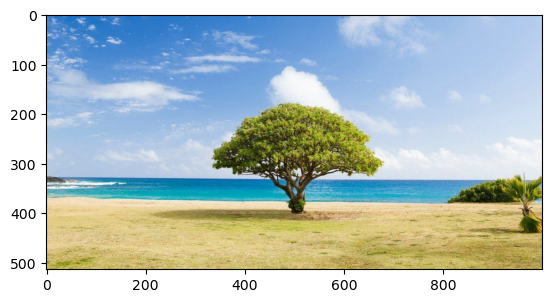

In [47]:
# test
from PIL import Image
from torchvision import transforms

convert_to_tensor = transforms.ToTensor()

image_path = os.path.join(os.pardir, 'images', '4.jpg')
img = Image.open(image_path)

img_tensor = convert_to_tensor(img)

# plt.imshow(img_tensor.numpy())
print(f'Imamge tensor original shape: {img_tensor.shape}')
print(f'Image tensor shape after squeeze: {img_tensor.permute(1, 2, 0).shape}')

plt.imshow(img_tensor.permute(1, 2, 0))
output_conv = conv_layer(img_tensor)

type(output_conv)



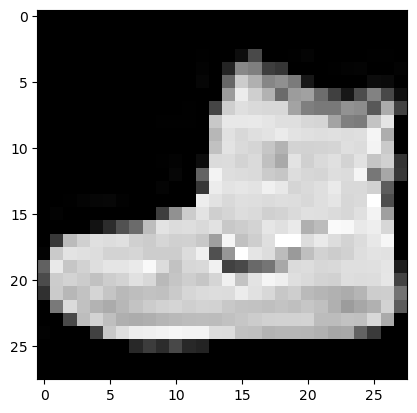

In [48]:
plt.imshow(image.squeeze(), cmap='gray')

In [49]:
rand_image_tensor = torch.randn(size=(1, 28, 28))

model_2(rand_image_tensor.unsqueeze(0).to(device)) 

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

#### Setup a loss function and optimizer for model_2

In [50]:
# setup loss function / eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)


#### Training and testing ```model_2``` with traning and testing functions

In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59598 | Train acc: 78.47%

Test loss: 0.39750 | Test acc: 85.56%

Epoch: 1
---------
Train loss: 0.35830 | Train acc: 87.03%

Test loss: 0.35085 | Test acc: 87.10%

Epoch: 2
---------
Train loss: 0.32301 | Train acc: 88.36%

Test loss: 0.32492 | Test acc: 88.16%

Train time on cuda:0: 78.774 seconds


In [52]:

epochs = 3

train_loss, train_acc = 0, 0

for epoch in tqdm(range(epochs)):
    # train
    model_2.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        # 1. forward pass
        y_pred = model_2(X)

        # 2. calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        # print(f'y: {y.shape} | y-pred: {y_pred.shape}')
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # 3. optimizer
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()
        
        # 5. optimizer step
        optimizer.step()

    # loss and accuracy for each epochs
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    print(f'Train loss: {train_loss} | Train accuracy: {train_acc}')

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.3024720549583435 | Train accuracy: 89.07833333333333
Train loss: 0.2901509404182434 | Train accuracy: 89.59417511111111
Train loss: 0.27986711263656616 | Train accuracy: 89.93611689339258


In [53]:
# get the model_2 results
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31010982394218445,
 'model_acc': 88.50838658146965}

#### Compare model results and training time

In [54]:
import pandas as pd

compare_results = pd.DataFrame([
    model_0_results,
    model_1_results,
    model_2_results
])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.510876,82.378195
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.310110,88.508387


In [55]:
# Add training time to results comparison
compare_results['training_time'] = [
    total_train_time_model_0,
    total_train_time_model_1,
    total_train_time_model_2
]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.510876,82.378195,62.172933
1,FashionMNISTModelV1,0.685001,75.019968,72.989794
2,FashionMNISTModelV2,0.310110,88.508387,78.774033


Text(0, 0.5, 'model')

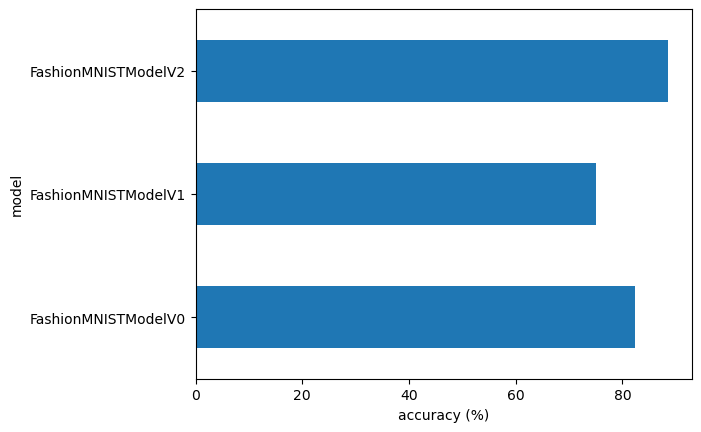

In [56]:
# visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model')

#### Make and evaluate random predicitons with best model

In [57]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for idx, sample in enumerate(data):
            # sample (1, 28, 28)
            # prepare the sample data (add a batch dimension and pass it to the target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            # sample (1, 1, 28, 28)

            # forward pass (model outputs raw logits)
            pred_logit = model(sample)
            # ([1, 10])

            # get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            # ([10])
            # get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    
    # stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [58]:
img, label = test_data[0][:10]

img.shape, label

(torch.Size([1, 28, 28]), 9)

In [59]:
import random
mylist = ["apple", "banana", "cherry", "two", "three", 'mango']

print(random.sample(mylist, k=5))

['banana', 'apple', 'three', 'cherry', 'two']


In [60]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# view the samples shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

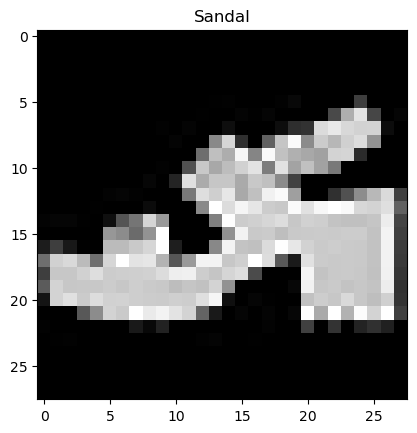

In [61]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [62]:
# make predictions
pred_probs = make_predictions(model=model_2,
                            data=test_samples)

# view first 2 prediction probabilities
pred_probs[:2]

tensor([[1.0944e-09, 1.5369e-09, 2.6975e-09, 4.3314e-10, 1.8341e-10, 9.9985e-01,
         4.8380e-09, 4.5445e-07, 8.3081e-07, 1.4937e-04],
        [1.1802e-03, 9.8001e-01, 5.6122e-05, 4.3192e-03, 4.9555e-03, 4.2698e-06,
         9.4664e-03, 3.3017e-06, 1.0803e-06, 8.5541e-06]])

In [63]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
print(f'Predictions:\n {pred_classes}')
print(f'Test labels: \n{test_labels}')

Predictions:
 tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])
Test labels: 
[5, 1, 7, 4, 3, 0, 4, 7, 1]


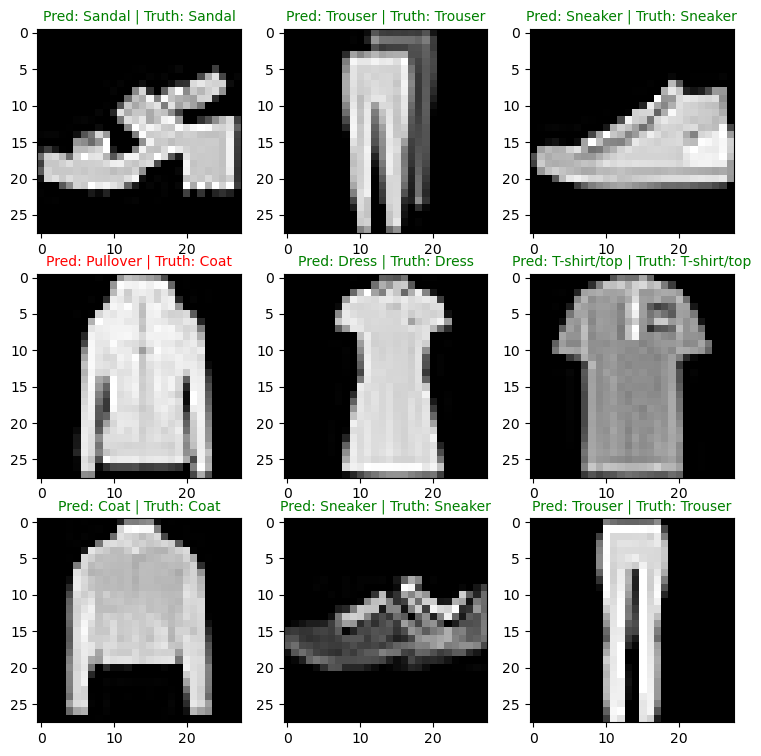

In [64]:
# PLOT predictions
plt.figure(figsize=(9, 9))
n_rows = 3
n_cols = 3
for i, sample in enumerate(test_samples):
    # create subplot
    plt.subplot(n_rows, n_cols, i+1)
    
    # plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # find the prediction (in text form, e.g 'sandle')
    pred_label = class_names[pred_classes[i]]

    # get the truth label(in text form)
    truth_label = class_names[test_labels[i]]

    # create a title for the plot
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'

    # check for equality between pred an truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') # green text if prediction is same as truth
    else:
        plt.title(title_text, fontsize=10, c='r')

#### Making a confusion matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confision_matrix()`

In [65]:
# import tqdm.auto
from tqdm.auto import tqdm

# 1. make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions....'):
        # send the data and targets to the targeted device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logits = model_2(X)
        # turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        # put prediction on CPU for evaluations 
        y_preds.append(y_pred.cpu())
    
    # concatenate list of predictions into a tensor
    print(y_preds)
    y_pred_tensor = torch.cat(y_preds)
    y_pred_tensor


Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 4, 8, 0, 2, 7, 7, 5,
        1, 6, 6, 0, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 7, 6, 7, 2, 1, 2, 6, 6, 6, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 6, 2, 6, 2, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 3, 6]), tensor([0, 1, 6, 6, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 6]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 8, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([8, 2, 3, 8, 0, 9, 4, 7, 4, 2, 6, 5, 6, 1, 2, 8, 3, 0, 9, 1, 0, 9, 3, 6,
        7, 9, 8, 4, 4, 7, 3, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 6, 6, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 2, 8, 6, 4,
        3, 4, 9, 7, 3, 5, 5, 2]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 6, 2, 3, 0, 8, 3, 7, 4,
       

In [66]:
# See if required packages are installed and if not, install them
try:
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')
    assert int(mlxtend.__version__.split('.')[1]) > 19, 'mlxtend versi should be 0.19.0 or higher'
except:
    !pip install torchmetrics -u mlxtend
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')

mlxtend version: 0.23.1


In [67]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

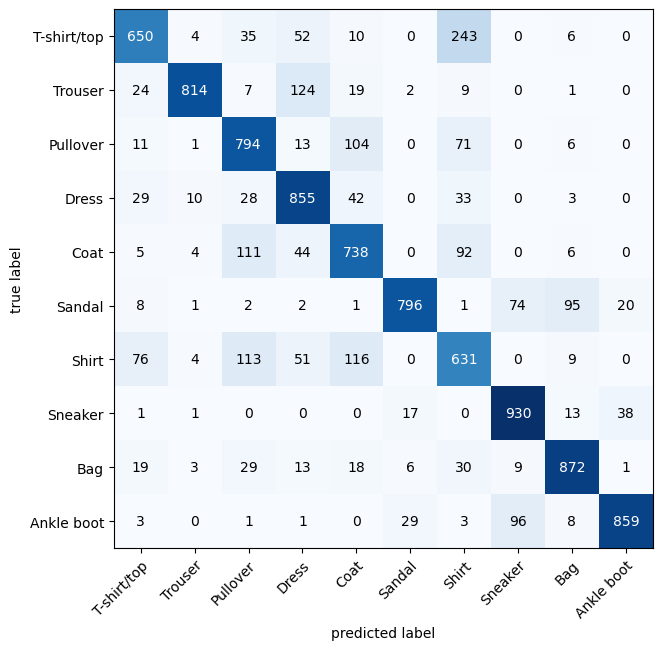

In [68]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. setup confusion instance and compare predictions to target
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

In [69]:
confmat_tensor

tensor([[650,   4,  35,  52,  10,   0, 243,   0,   6,   0],
        [ 24, 814,   7, 124,  19,   2,   9,   0,   1,   0],
        [ 11,   1, 794,  13, 104,   0,  71,   0,   6,   0],
        [ 29,  10,  28, 855,  42,   0,  33,   0,   3,   0],
        [  5,   4, 111,  44, 738,   0,  92,   0,   6,   0],
        [  8,   1,   2,   2,   1, 796,   1,  74,  95,  20],
        [ 76,   4, 113,  51, 116,   0, 631,   0,   9,   0],
        [  1,   1,   0,   0,   0,  17,   0, 930,  13,  38],
        [ 19,   3,  29,  13,  18,   6,  30,   9, 872,   1],
        [  3,   0,   1,   1,   0,  29,   3,  96,   8, 859]])

In [70]:
# save and load the best performing model
from pathlib import Path

# create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create model save
MODEL_NAME = '03_pytorch_computer_vison_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vison_model_2.pth


In [74]:
# create new instance from saved model
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

# Load in the save state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# send the model to target device
loaded_model_2.to(device=device)


FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [73]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31010982394218445,
 'model_acc': 88.50838658146965}

In [78]:
# Evaluate the model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31010982394218445,
 'model_acc': 88.50838658146965}

In [80]:
# check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-03)


tensor(True)

## 19:43:00